<a href="https://colab.research.google.com/github/cesaradrianpenalozaalarcon-byte/Simulacion-2/blob/main/Metropolis_hashtings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [31]:
def f(x,y): #Esta es nuestra funcion objetivo nos servira para generar la muestra
  return (1/20216.335877)*np.exp(-(x**2*y**2+x**2+y**2-8*x-8*y)/2)

def a(x, y):

    return min(1, f(y[0], y[1]) / f(x[0], x[1])) #La funcion alpha


def norm( mu, s=1):#La funcion normal pero de 2 dimensiones
  return np.random.normal(mu,s, size=2)

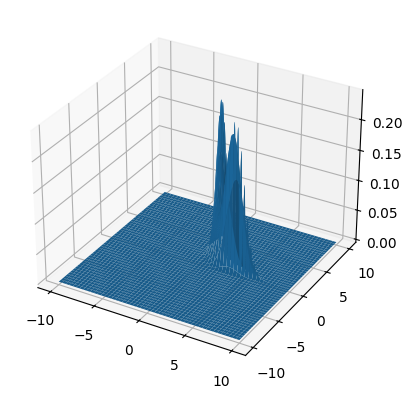

In [32]:
x= np.linspace(-10,10,1000) #Primero graficaremos a la funcion que queremos muestrear
y= np.linspace(-10,10,1000) #Para eso generamos los valores de los ejes y graficamos en 3 dimensiones
x,y= np.meshgrid(x,y)
z= f(x,y)

fig= plt.figure()
ax= fig.add_subplot(111,projection='3d')
ax.plot_surface(x,y,z)
plt.show()

In [33]:
def Metropolis_Hastings(x0, n): #EL algoritmos metropolis
    x = [np.array(x0)] #Aqui guardamos los valores de 2 dimensiones del metropolis
    for _ in range(n):

        y = norm(mu=x[-1], s=1) #Una normal de una dimension
        u = np.random.uniform(0, 1) #Una variable entre 0 y 1
        if u <= a(x[-1], y): #Si "a" es mayor que 1 o la funcion f(y)/f(x)
            x.append(y) #Lo que asemos es guardar en nuestra lista de 2 dimensiones a el ultimo valor de la normal
        else:
            x.append(x[-1]) #Caso contrario en x guardamos el ultimo valor de la lista x
    return np.array(x)

El algoritmo metropolis hastings funciona porque genera una cadena de markov cuya distribucion es la distribucion de la funcion que necesitamos.
Se puede ver trabajando de la siguiente forma, genera un candidato de punto desde una distribucion normal, despues usando el crieterio de alpha se decide si se rechaza o se acepta.
Se parece mucho al metodo de montecarlo pero enves de ser abajo de la funcion los valores que se aceptan los valores que se aceptan son lo que cumplen la condicion

La razon de aceptacion de los valores de la muestra a(x,y) = min(1, π(y)/π(x)) Esta regla nos garantiza que cada punto aparezca con la misma probabilidad que la funcion objetivo.

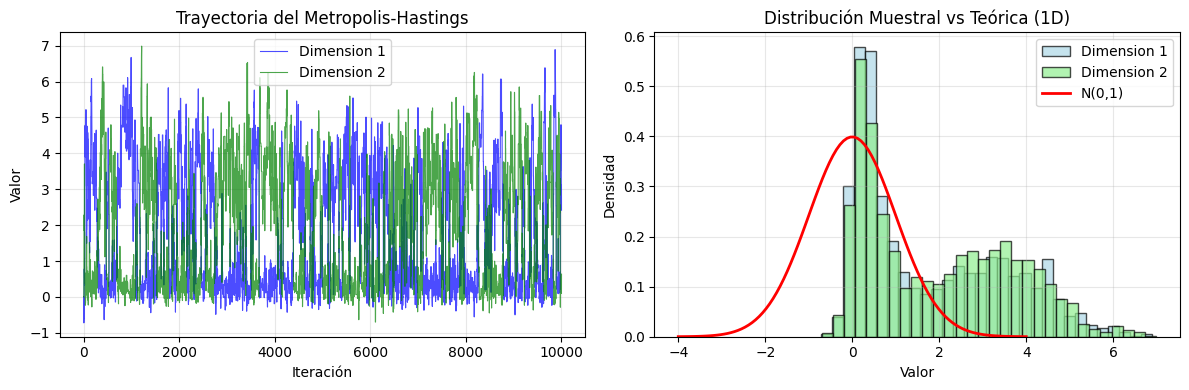

In [51]:
# Generar datos
x0 = [0.0, 0.0]
n = 10000
muestras = Metropolis_Hastings(x0, n)
plt.figure(figsize=(12, 4))

# Gráfico 1: Trayectoria
plt.subplot(1, 2, 1)
iteraciones = np.linspace(0, len(muestras)-1, len(muestras))
# Plot both dimensions of the trajectory
plt.plot(iteraciones, muestras[:, 0], 'b-', alpha=0.7, linewidth=0.8, label='Dimension 1')
plt.plot(iteraciones, muestras[:, 1], 'g-', alpha=0.7, linewidth=0.8, label='Dimension 2')
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.title('Trayectoria del Metropolis-Hastings')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Histograma vs distribución teórica
plt.subplot(1, 2, 2)
# Plot histograms for each dimension
plt.hist(muestras[:, 0], bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black', label='Dimension 1')
plt.hist(muestras[:, 1], bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black', label='Dimension 2')


# Usar linspace para la curva teórica
x_teorico = np.linspace(-4, 4, 100)
from scipy.stats import norm as normal_dist # Import norm from scipy for PDF
y_teorico = normal_dist.pdf(x_teorico, 0, 1) # Use scipy's norm.pdf
plt.plot(x_teorico, y_teorico, 'r-', linewidth=2, label='N(0,1)')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Distribución Muestral vs Teórica (1D)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

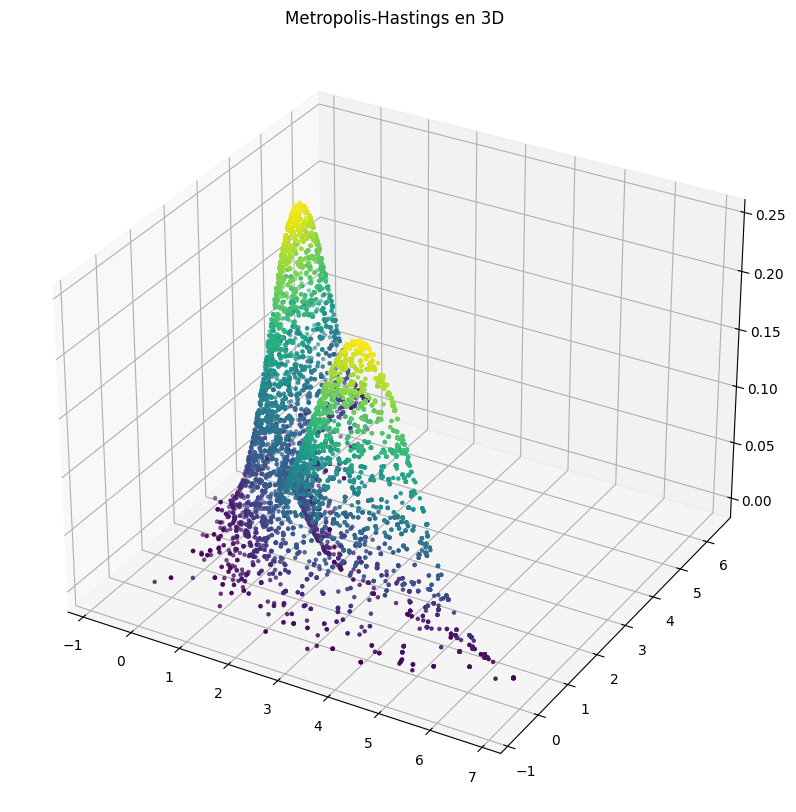

In [46]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the sampled points
ax.scatter(muestras[:, 0], muestras[:, 1], f(muestras[:, 0], muestras[:, 1]), c=f(muestras[:, 0], muestras[:, 1]), cmap='viridis', marker='.')
ax.set_title('Metropolis-Hastings en 3D')
plt.show()

In [47]:
#Son los valores de f
f_values = f(muestras[:, 0], muestras[:, 1])
#Encontramos a el punto con el valor maximo de la funcion
max_f_index = np.argmax(f_values)
#Tomamos el punto de muestra que orresponde al maximo
max_sample = muestras[max_f_index]
max_f_value = f_values[max_f_index]

print(f"Los valores con el valor maximo son: {max_sample}")
print(f"El valor f maximo es: {max_f_value}")

Los valores con el valor maximo son: [3.73156743 0.26378458]
El valor f maximo es: 0.24307631280988018


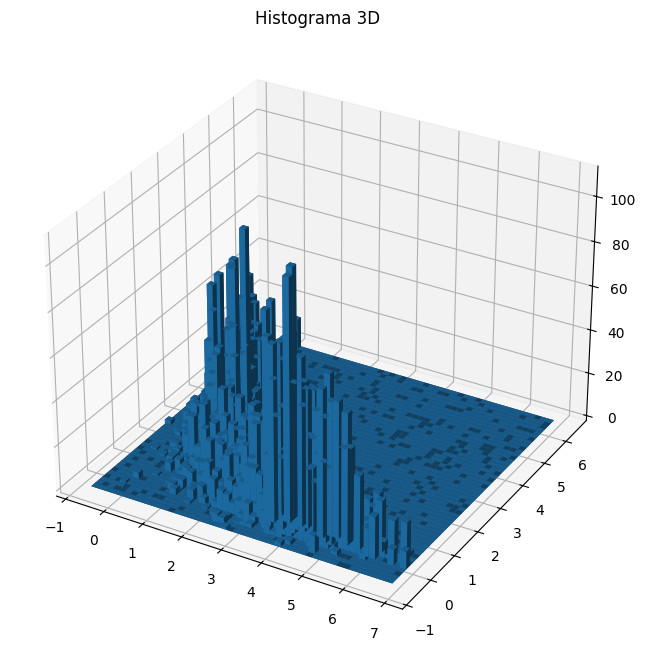

In [50]:
# Generamos un histograma de 2 dimensiones, lo necesitamos para el de 3 dimensiones
hist, xedges, yedges = np.histogram2d(muestras[:, 0], muestras[:, 1], bins=50)

xpos, ypos = np.meshgrid(xedges[:-1] + np.diff(xedges)/2, yedges[:-1] + np.diff(yedges)/2)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

# La dimensiones de las variables
dx = dy = np.diff(xedges)[0]
dz = hist.flatten()

#Creamos la grafica 3d
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_title('Histograma 3D')

plt.show()